In [101]:
# Resolve paths from root project directory

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from data_tools import load_parsed_data

In [103]:
# Plot styles
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')

In [104]:
tweet_df = load_parsed_data('../data/14-nov/parsed_tweets.json', exclude_cols={
    "tokens", 
    "cleaned_text", 
    "text", 
    "last_retweeted", 
    "place", 
    "processed",
    "media", 
    "isDeleted"
}, verbose=True)
tweet_df.shape
tweet_df.columns

Loading 2696807 json lines
(4%): 100000 lines in ../data/14-nov/parsed_tweets.json processed (4.050372123718262 sec)
(7%): 200000 lines in ../data/14-nov/parsed_tweets.json processed (1.7753798961639404 sec)
(11%): 300000 lines in ../data/14-nov/parsed_tweets.json processed (1.728912115097046 sec)
(15%): 400000 lines in ../data/14-nov/parsed_tweets.json processed (1.4081931114196777 sec)
(19%): 500000 lines in ../data/14-nov/parsed_tweets.json processed (4.66060996055603 sec)
(22%): 600000 lines in ../data/14-nov/parsed_tweets.json processed (1.878087043762207 sec)
(26%): 700000 lines in ../data/14-nov/parsed_tweets.json processed (1.5215270519256592 sec)
(30%): 800000 lines in ../data/14-nov/parsed_tweets.json processed (1.779203176498413 sec)
(33%): 900000 lines in ../data/14-nov/parsed_tweets.json processed (1.99009108543396 sec)
(37%): 1000000 lines in ../data/14-nov/parsed_tweets.json processed (5.126471757888794 sec)
(41%): 1100000 lines in ../data/14-nov/parsed_tweets.json proce

Index(['hashtags', 'replyTo', 'replyTo_user', 'urls', 'hasMedia',
       'quote_tweet', 'retweet_count', 'timestamp', 'quote_count', 'user',
       'voter fraud', '#electionfraud', 'ballot fraud', '#voterfraud',
       '#stopthesteal', 'Stolen ballots', 'Election fraud',
       'ballot harvesting', '#electioninterference', '#cheatingdemocrats',
       'Election interference', '#ballotfraud', 'cheating democrats',
       '#electiontampering', '#ballotharvesting', '#voterfraudisreal',
       'Destroyed ballots', 'democrats cheat', '#stopvoterfraud',
       '#ballotvoterfraud', 'Election tampering', '#democratvoterfraud',
       'Discarded ballots', 'vote by mail fraud', 'harvest ballot',
       '#gopvoterfraud', '#nomailinvoting', '#votebymailfraud',
       '#mailinvoterfraud', 'Pre-filled ballot', 'Hacked voting machine',
       '#ilhanomarballotharvesting', '#ilhanomarvoterfraud',
       '#hackedvotingmachines', '#discardedballots'],
      dtype='object')

In [105]:
tweet_df["hashtags"][:10]

0                              []
1                              []
2                              []
3                              []
4                              []
5    [GodWinsALWAYS, RedWave2020]
6                              []
7                              []
8                              []
9                              []
Name: hashtags, dtype: object

In [106]:
retweet_df = load_parsed_data('../data/14-nov/parsed_retweets.json')
retweet_df.shape
retweet_df.columns

Loading 8044982 json lines
(1%): 100000 lines in ../data/14-nov/parsed_retweets.json processed (0.4616520404815674 sec)
(2%): 200000 lines in ../data/14-nov/parsed_retweets.json processed (0.31215691566467285 sec)
(4%): 300000 lines in ../data/14-nov/parsed_retweets.json processed (0.29503893852233887 sec)
(5%): 400000 lines in ../data/14-nov/parsed_retweets.json processed (0.44733619689941406 sec)
(6%): 500000 lines in ../data/14-nov/parsed_retweets.json processed (0.34054088592529297 sec)
(7%): 600000 lines in ../data/14-nov/parsed_retweets.json processed (0.3366260528564453 sec)
(9%): 700000 lines in ../data/14-nov/parsed_retweets.json processed (0.3007009029388428 sec)
(10%): 800000 lines in ../data/14-nov/parsed_retweets.json processed (0.4179699420928955 sec)
(11%): 900000 lines in ../data/14-nov/parsed_retweets.json processed (0.4312870502471924 sec)
(12%): 1000000 lines in ../data/14-nov/parsed_retweets.json processed (0.35039591789245605 sec)
(14%): 1100000 lines in ../data/14

Index(['timestamp', 'user', 'retweeted', 'retweetedFrom_user'], dtype='object')

In [107]:
user_df = load_parsed_data('../data/14-nov/parsed_users.json', exclude_cols={"description"})
user_df.shape
user_df.columns

Loading 806800 json lines
(12%): 100000 lines in ../data/14-nov/parsed_users.json processed (1.160588026046753 sec)
(25%): 200000 lines in ../data/14-nov/parsed_users.json processed (1.0930981636047363 sec)
(37%): 300000 lines in ../data/14-nov/parsed_users.json processed (1.1410109996795654 sec)
(50%): 400000 lines in ../data/14-nov/parsed_users.json processed (1.3880839347839355 sec)
(62%): 500000 lines in ../data/14-nov/parsed_users.json processed (1.1745100021362305 sec)
(74%): 600000 lines in ../data/14-nov/parsed_users.json processed (1.1086137294769287 sec)
(87%): 700000 lines in ../data/14-nov/parsed_users.json processed (1.1121957302093506 sec)
(99%): 800000 lines in ../data/14-nov/parsed_users.json processed (1.077286958694458 sec)
Done loading ../data/14-nov/parsed_users.json
806800 lines in ../data/14-nov/parsed_users.json processed (9.322933197021484 sec)


Index(['created_at', 'followed_cnts', 'friends_count', 'protected', 'url',
       'followers_count', 'name', 'handle', 'location', 'verified', 'friends'],
      dtype='object')

In [129]:
recent_tweet_df = tweet_df[tweet_df.timestamp > '2020-10-23 00:00:00']

# 1) Basic stats

- \# of tweets
- \# of retweets
- \# of accounts
- Stream from when to when (using retweets)
- Volume per day

In [130]:
print("--Size--")
print("Number of tweets: {:,}".format(len(tweet_df.index)))
print("Number of tweets after October 23rd: {:,}".format(len(recent_tweet_df.index)))
print("Number of retweets: {:,}".format(len(retweet_df.index)))
print("Number of accounts: {:,}".format(len(user_df.index)))
print()
print("--Coverage--")
print("Earliest tweet: {}, last tweet: {}".format(tweet_df.timestamp.min(), tweet_df.timestamp.max()))
print("Earliest retweet: {}, last retweet: {}".format(retweet_df.timestamp.min(), retweet_df.timestamp.max()))

--Size--
Number of tweets: 2,696,807
Number of tweets after October 23rd: 2,693,133
Number of retweets: 8,044,982
Number of accounts: 806,800

--Coverage--
Earliest tweet: 2011-04-07T01:54:00Z, last tweet: 2020-11-14T23:49:20Z
Earliest retweet: 2020-10-23T16:59:58Z, last retweet: 2020-11-15T00:44:22Z


# 2) Retweet count by hour for our data


In [109]:
def group_df_by_hour(df, column='timestamp'):
    grouped_by_hour = (pd.to_datetime(df[column])
        .dt.floor('H')
        .value_counts()
        .rename_axis('date')
        .reset_index(name='count')).sort_values(by=['date'])
    return grouped_by_hour.set_index('date')

retweet_df_by_hour = group_df_by_hour(retweet_df)
len(retweet_df_by_hour.index)

517

In [110]:
retweet_df_by_hour[:10]

,count
date,
2020-10-23 16:00:00+00:00,1
2020-10-23 17:00:00+00:00,681
2020-10-23 18:00:00+00:00,1272
2020-10-23 19:00:00+00:00,561
2020-10-23 20:00:00+00:00,932
2020-10-23 21:00:00+00:00,847
2020-10-23 22:00:00+00:00,1160
2020-10-23 23:00:00+00:00,966
2020-10-24 00:00:00+00:00,597


In [111]:
rolling_average = retweet_df_by_hour.rolling('12h').mean()

rolling_average[:10]

,count
date,
2020-10-23 16:00:00+00:00,1.000000
2020-10-23 17:00:00+00:00,341.000000
2020-10-23 18:00:00+00:00,651.333333
2020-10-23 19:00:00+00:00,628.750000
2020-10-23 20:00:00+00:00,689.400000
2020-10-23 21:00:00+00:00,715.666667
2020-10-23 22:00:00+00:00,779.142857
2020-10-23 23:00:00+00:00,802.500000
2020-10-24 00:00:00+00:00,779.666667


Text(0.5, 1.0, 'Retweet Coverage (total=8,044,982)')

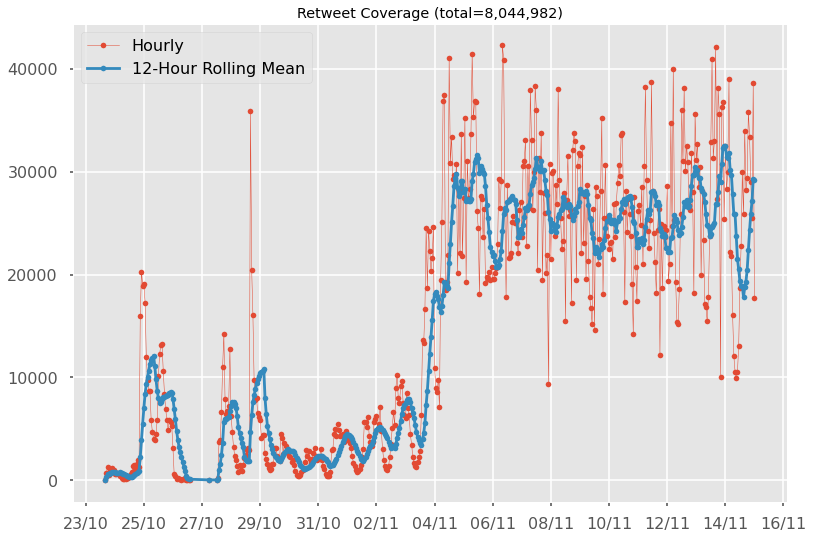

In [112]:
fig, ax = plt.subplots()   


ax.plot(retweet_df_by_hour["count"], label="Hourly", marker='.', linestyle='-', linewidth=0.5)
ax.plot(rolling_average["count"], marker='.', linestyle='-', label='12-Hour Rolling Mean')

ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
# mdates.HourLocator(interval = 12)
ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2))


ax.set_title('Retweet Coverage (total={:,})'.format(len(retweet_df.index)))

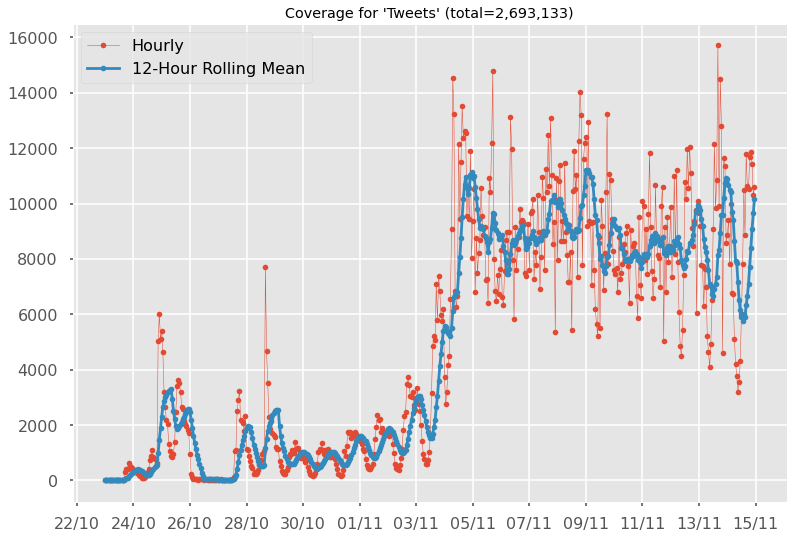

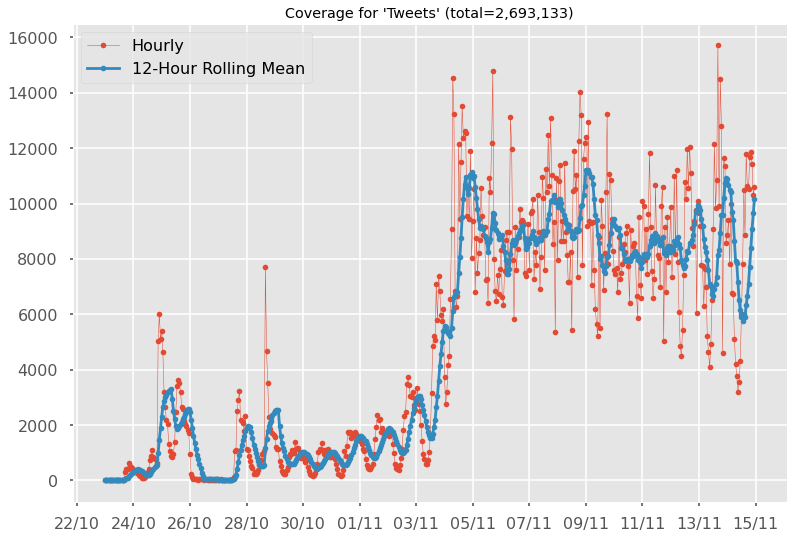

In [132]:
plot_hourly_coverage(recent_tweet_df, "Tweets")

# 3-6) Analyzing crawled terms among streamed tweets

In [113]:
# To-do: replace with import
#from data_tools import load_crawled_terms
def load_crawled_terms(filename):
  crawled_terms = []
  with open(filename) as r:
    for line in r:
      crawled_terms.append(line.replace("\n", ""))
  
  return crawled_terms

crawled_terms = load_crawled_terms("../keywords-3nov.txt")
crawled_terms

['#ballotfraud',
 '#ballotharvesting',
 '#ballotvoterfraud',
 '#cheatingdemocrats',
 '#democratvoterfraud',
 '#discardedballots',
 '#electionfraud',
 '#electioninterference',
 '#electiontampering',
 '#gopvoterfraud',
 '#hackedvotingmachines',
 '#ilhanomarballotharvesting',
 '#ilhanomarvoterfraud',
 '#mailinvoterfraud',
 '#nomailinvoting',
 '#stopgopvoterfraud',
 '#stopthesteal',
 '#stopvoterfraud',
 '#votebymailfraud',
 '#voterfraud',
 '#voterfraudisreal',
 'Destroyed ballots',
 'Discarded ballots',
 'Election fraud',
 'Election interference',
 'Election tampering',
 'Hacked voting machine',
 'Pre-filled ballot',
 'Stolen ballots',
 'ballot fraud',
 'ballot harvesting',
 'cheating democrats',
 'democrats cheat',
 'harvest ballot',
 'vote by mail fraud',
 'voter fraud']

In [114]:
# Prepare crawled terms dataframe

crawled_terms_stats = []

for term in crawled_terms:
    if term in tweet_df.columns:
        stats = {}
        stats["term"] = term
        stats["count"] = tweet_df[term].value_counts().values[0]
        crawled_terms_stats.append(stats)

crawled_terms_df = pd.DataFrame(crawled_terms_stats).sort_values(by=['count'], ascending=False)
crawled_terms_df[:5]

,term,count
34,voter fraud,656700
15,#stopthesteal,233686
22,Election fraud,217878
18,#voterfraud,119975
6,#electionfraud,48603


In [115]:
from interface.utils import plot_hourly_coverage

def plot_hourly_coverage(df, title):
    df_by_hour = group_df_by_hour(df)
    rolling_average = df_by_hour.rolling('12h').mean()

    fig, ax = plt.subplots()   

    ax.plot(df_by_hour["count"], label="Hourly", marker='.', linestyle='-', linewidth=0.5)
    ax.plot(rolling_average["count"], marker='.', linestyle='-', label='12-Hour Rolling Mean')

    ax.legend()

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    # mdates.HourLocator(interval = 12)
    ax.xaxis.set_major_locator(mdates.DayLocator(interval = 2))

    ax.set_title("Coverage for '{}' (total={:,})".format(title, len(df.index)))
    
    return fig

test


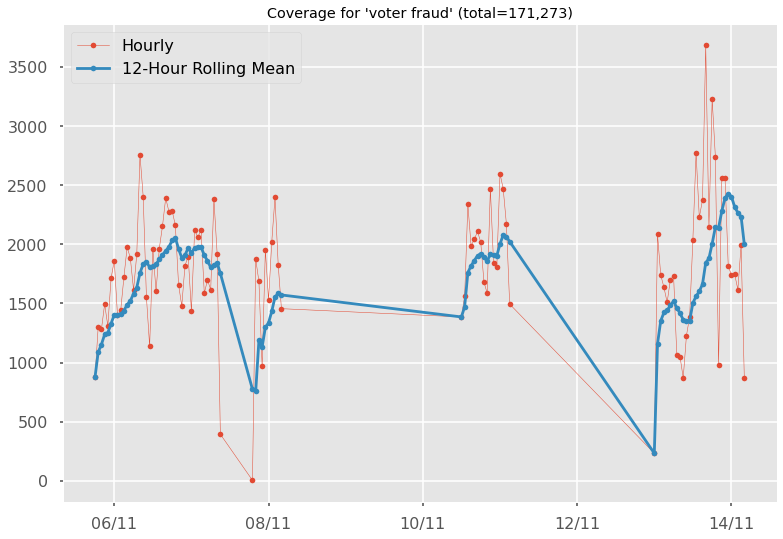

In [36]:

selected_crawled_term = "voter fraud"

filtered_by_crawled_term = tweet_df[tweet_df[selected_crawled_term] == 1]

plot_hourly_coverage(filtered_by_crawled_term, selected_crawled_term)
print("test")

<AxesSubplot:>

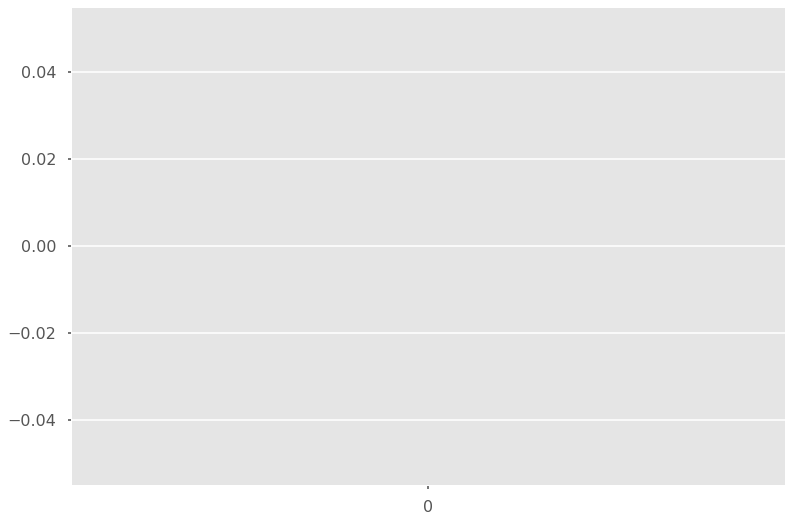

In [116]:
# Histogram by hour for each hashtag/phrases crawled (i.e. “crawled terms”). 

by_hour = group_df_by_hour(filtered_by_crawled_term)

sns.barplot()

# 5) Co-occurrence matrix

In [117]:
# Co-occ
terms_in_df = [term for term in crawled_terms if term in tweet_df.columns]
crawled_terms_tweet_df = tweet_df[terms_in_df].fillna(0).astype(int)
co_occurrence = crawled_terms_tweet_df.T.dot(crawled_terms_tweet_df)

co_occurrence

,#ballotfraud,#ballotharvesting,#ballotvoterfraud,#cheatingdemocrats,#democratvoterfraud,#discardedballots,#electionfraud,#electioninterference,#electiontampering,#gopvoterfraud,...,Hacked voting machine,Pre-filled ballot,Stolen ballots,ballot fraud,ballot harvesting,cheating democrats,democrats cheat,harvest ballot,vote by mail fraud,voter fraud
#ballotfraud,1570,165,0,8,0,0,239,77,6,0,...,0,0,0,20,6,0,2,2,0,17
#ballotharvesting,165,7621,26,169,10,1,791,202,37,0,...,0,0,0,15,82,1,3,10,0,252
#ballotvoterfraud,0,26,45,0,0,0,24,22,22,0,...,0,0,0,0,0,0,0,0,0,0
#cheatingdemocrats,8,169,0,7163,35,0,217,126,2,0,...,0,0,1,0,2,3,16,0,0,123
#democratvoterfraud,0,10,0,35,1751,0,10,7,0,0,...,0,0,0,1,5,0,0,0,0,169
#discardedballots,0,1,0,0,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#electionfraud,239,791,24,217,10,1,48603,954,127,0,...,0,1,8,132,32,8,39,2,0,860
#electioninterference,77,202,22,126,7,0,954,13744,85,0,...,0,0,1,7,3,1,2,0,0,194
#electiontampering,6,37,22,2,0,0,127,85,834,0,...,0,0,0,0,0,0,0,0,0,11
#gopvoterfraud,0,0,0,0,0,0,0,0,0,362,...,0,0,0,0,0,0,0,0,0,26


In [135]:
co_occurrence_diagonal = np.diagonal(co_occurrence)

with np.errstate(divide='ignore', invalid='ignore'):
    co_occurrence_percentage = np.nan_to_num(np.true_divide(co_occurrence, co_occurrence_diagonal[:, None]))

pd.DataFrame(np.log(co_occurrence_percentage), index=co_occurrence.index, columns=co_occurrence.columns)

,#ballotfraud,#ballotharvesting,#ballotvoterfraud,#cheatingdemocrats,#democratvoterfraud,#discardedballots,#electionfraud,#electioninterference,#electiontampering,#gopvoterfraud,...,Hacked voting machine,Pre-filled ballot,Stolen ballots,ballot fraud,ballot harvesting,cheating democrats,democrats cheat,harvest ballot,vote by mail fraud,voter fraud
#ballotfraud,0.000000,-2.252885,-inf,-5.279389,-inf,-inf,-1.882367,-3.015025,-5.567071,-inf,...,-inf,-inf,-inf,-4.363099,-5.567071,-inf,-6.665684,-6.665684,-inf,-4.525618
#ballotharvesting,-3.832717,0.000000,-5.680566,-3.808764,-6.636078,-8.938663,-2.265365,-3.630395,-5.327745,-inf,...,-inf,-inf,-inf,-6.230613,-4.531944,-8.938663,-7.840051,-6.636078,-inf,-3.409234
#ballotvoterfraud,-inf,-0.548566,0.000000,-inf,-inf,-inf,-0.628609,-0.715620,-0.715620,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
#cheatingdemocrats,-6.797243,-3.746785,-inf,0.000000,-5.321336,-inf,-3.496787,-4.040402,-8.183537,-inf,...,-inf,-inf,-8.876684,-inf,-8.183537,-7.778072,-6.104095,-inf,-inf,-4.064500
#democratvoterfraud,-inf,-5.165357,-inf,-3.912594,0.000000,-inf,-5.165357,-5.522032,-inf,-inf,...,-inf,-inf,-inf,-7.467942,-5.858504,-inf,-inf,-inf,-inf,-2.338044
#discardedballots,-inf,-1.098612,-inf,-inf,-inf,0.000000,-1.098612,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
#electionfraud,-5.314977,-4.118143,-7.613387,-5.411543,-8.488855,-10.791441,0.000000,-3.930777,-5.947253,-inf,...,-inf,-10.791441,-8.711999,-5.908639,-7.325705,-8.711999,-7.127879,-10.098293,-inf,-4.034508
#electioninterference,-5.184552,-4.220090,-6.437315,-4.692076,-7.582447,-inf,-2.667694,0.000000,-5.085706,-inf,...,-inf,-inf,-9.528358,-7.582447,-8.429745,-9.528358,-8.835210,-inf,-inf,-4.260499
#electiontampering,-4.934474,-3.115315,-3.635191,-6.033086,-inf,-inf,-1.882046,-2.283582,0.000000,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-4.328338
#gopvoterfraud,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.000000,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-2.633548
